<a href="https://colab.research.google.com/github/LazyHooks/ACN_clustering/blob/main/ben_bps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [2]:
import warnings

warnings.filterwarnings('ignore')

input

In [3]:
df = pd.read_csv("ben_bps.csv")

exploratory

In [4]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Level       921 non-null    int64
 1   Gender      921 non-null    int64
 2   Tenure      921 non-null    int64
 3   KT          921 non-null    int64
 4   Ext Parity  921 non-null    int64
 5   med1        921 non-null    int64
 6   med2        921 non-null    int64
 7   med3        921 non-null    int64
 8   lv1         921 non-null    int64
 9   lv2         921 non-null    int64
 10  lv3         921 non-null    int64
 11  ben1        921 non-null    int64
 12  ben2        921 non-null    int64
 13  ben3        921 non-null    int64
dtypes: int64(14)
memory usage: 100.9 KB


In [5]:
df.head()

,Level,Gender,Tenure,KT,Ext Parity,med1,med2,med3,lv1,lv2,lv3,ben1,ben2,ben3
0,0,0,1,0,1,16,15,14,5,4,6,4,3,6
1,0,0,2,0,1,16,15,13,2,1,3,2,5,4
2,0,0,3,0,1,15,16,13,6,1,3,1,2,3
3,0,0,1,0,1,16,13,15,7,8,2,4,6,5
4,1,0,4,1,1,13,14,15,7,2,4,3,2,1


checks

In [6]:
df.isnull().sum()
df.describe()

,Level,Gender,Tenure,KT,Ext Parity,med1,med2,med3,lv1,lv2,lv3,ben1,ben2,ben3
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,0.545060,0.635179,2.659066,0.545060,0.516830,13.558089,13.761129,13.896851,4.129207,3.487514,3.597177,2.581976,2.899023,3.376764
std,0.555975,0.481641,1.225165,0.498236,0.499988,1.468933,1.277501,1.403877,2.536178,2.119810,1.840827,1.506530,1.468365,1.515235
min,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,13.000000,13.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,1.000000,1.000000,3.000000,1.000000,1.000000,13.000000,14.000000,14.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000
75%,1.000000,1.000000,4.000000,1.000000,1.000000,15.000000,15.000000,15.000000,7.000000,5.000000,5.000000,3.000000,4.000000,5.000000
max,2.000000,1.000000,4.000000,1.000000,1.000000,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,6.000000,6.000000,6.000000


In [7]:
X=df

Scaling

In [8]:
cols = X.columns

In [9]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [10]:
X = pd.DataFrame(X, columns=[cols])

In [11]:
X.head()

,Level,Gender,Tenure,KT,Ext Parity,med1,med2,med3,lv1,lv2,lv3,ben1,ben2,ben3
0,0.0,0.0,0.000000,0.0,1.0,1.00,0.75,0.50,0.571429,0.428571,0.714286,0.6,0.4,1.0
1,0.0,0.0,0.333333,0.0,1.0,1.00,0.75,0.25,0.142857,0.000000,0.285714,0.2,0.8,0.6
2,0.0,0.0,0.666667,0.0,1.0,0.75,1.00,0.25,0.714286,0.000000,0.285714,0.0,0.2,0.4
3,0.0,0.0,0.000000,0.0,1.0,1.00,0.25,0.75,0.857143,1.000000,0.142857,0.6,1.0,0.8
4,0.5,0.0,1.000000,1.0,1.0,0.25,0.50,0.75,0.857143,0.142857,0.428571,0.4,0.2,0.0


In [12]:
X.dropna(inplace=True)
X

,Level,Gender,Tenure,KT,Ext Parity,med1,med2,med3,lv1,lv2,lv3,ben1,ben2,ben3
0,0.0,0.0,0.000000,0.0,1.0,1.00,0.75,0.50,0.571429,0.428571,0.714286,0.6,0.4,1.0
1,0.0,0.0,0.333333,0.0,1.0,1.00,0.75,0.25,0.142857,0.000000,0.285714,0.2,0.8,0.6
2,0.0,0.0,0.666667,0.0,1.0,0.75,1.00,0.25,0.714286,0.000000,0.285714,0.0,0.2,0.4
3,0.0,0.0,0.000000,0.0,1.0,1.00,0.25,0.75,0.857143,1.000000,0.142857,0.6,1.0,0.8
4,0.5,0.0,1.000000,1.0,1.0,0.25,0.50,0.75,0.857143,0.142857,0.428571,0.4,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,0.5,1.0,1.000000,1.0,0.0,0.00,0.25,1.00,0.857143,0.142857,0.428571,0.2,0.0,0.6
917,0.0,0.0,1.000000,0.0,1.0,0.25,0.75,1.00,0.142857,0.000000,0.428571,0.6,1.0,0.8
918,0.5,1.0,1.000000,1.0,0.0,0.25,0.50,0.75,0.857143,0.142857,0.000000,0.4,0.6,1.0
919,0.0,1.0,1.000000,0.0,1.0,0.00,0.50,0.75,0.571429,0.428571,0.857143,0.0,0.6,0.8


K means

In [13]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [14]:
kmeans.cluster_centers_

array([[ 2.24789916e-01,  5.79831933e-01,  5.42717087e-01,
         5.14705882e-01,  1.00000000e+00,  4.10189076e-01,
         4.57457983e-01,  4.88445378e-01,  4.12364946e-01,
         3.55042017e-01,  3.73949580e-01,  3.05882353e-01,
         3.82773109e-01,  4.76470588e-01],
       [ 3.23595506e-01,  6.94382022e-01,  5.64044944e-01,
         5.77528090e-01, -1.33226763e-15,  3.67415730e-01,
         4.21910112e-01,  4.58988764e-01,  4.84109149e-01,
         3.55698234e-01,  3.67897271e-01,  3.27640449e-01,
         3.76629213e-01,  4.74157303e-01]])

inertia

In [15]:
kmeans.inertia_

1505.191399211638

Elbow

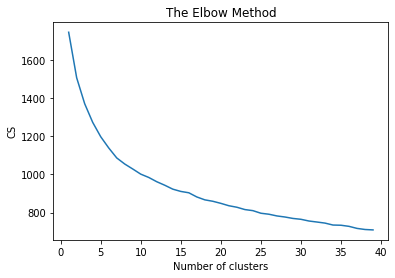

In [16]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

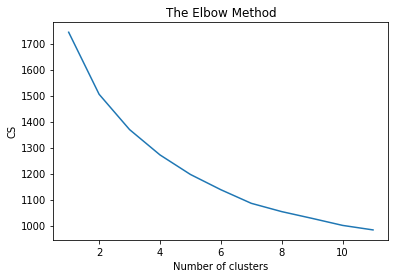

In [17]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [19]:
labels=kmeans.labels_
print(labels)

[2 2 2 2 0 0 1 0 1 3 2 3 3 2 0 1 2 0 2 0 3 2 0 3 0 2 0 3 1 3 0 1 0 0 2 1 3
 2 3 1 0 3 2 3 0 2 2 2 3 2 0 0 3 3 3 3 0 3 0 0 1 1 1 3 1 3 3 3 0 1 2 3 3 2
 2 3 3 3 0 3 1 1 0 0 2 0 3 0 3 2 3 0 0 2 3 0 1 3 0 3 0 3 0 0 0 0 0 2 3 0 2
 2 0 1 2 1 3 0 2 0 0 2 0 3 0 1 1 1 3 1 0 2 0 2 3 1 0 1 3 2 0 0 0 3 2 0 2 2
 0 3 0 2 0 2 0 1 2 0 1 0 1 3 2 0 1 3 2 1 0 0 3 0 2 0 3 3 0 1 3 1 3 1 2 0 1
 1 3 2 2 2 2 3 1 1 1 3 1 3 2 1 0 2 1 2 2 0 0 3 1 0 0 0 3 0 0 3 0 3 1 2 3 1
 2 2 0 0 3 3 0 2 2 3 2 2 3 3 3 3 1 2 2 3 0 0 3 2 3 2 2 2 3 2 3 2 3 0 3 1 1
 2 0 0 0 3 2 3 0 1 0 3 0 0 0 0 0 3 2 3 2 1 0 1 0 3 1 2 2 1 1 1 2 0 0 3 2 3
 2 2 1 0 1 2 3 2 1 2 3 0 3 3 2 2 3 2 3 1 0 0 2 1 3 0 2 3 1 2 2 3 2 1 3 2 2
 3 2 2 3 1 2 3 3 1 2 1 1 2 3 2 2 3 0 3 2 3 2 2 3 0 2 3 2 2 2 2 3 2 1 0 0 1
 1 0 0 2 1 3 2 2 1 0 3 0 3 2 3 1 1 3 3 3 1 3 3 3 1 3 0 3 1 3 0 0 0 3 3 0 1
 3 2 3 1 3 2 0 3 2 0 1 3 2 3 3 0 3 3 0 2 0 3 0 0 2 2 3 0 3 2 1 0 2 3 2 1 0
 3 0 3 1 1 2 0 3 1 1 1 3 1 0 3 3 1 2 2 2 1 1 0 3 2 3 0 1 0 3 3 0 2 0 0 3 2
 0 2 1 0 0 2 3 3 2 2 3 1 

In [20]:
Z=kmeans.cluster_centers_
Z

array([[ 2.93877551e-01,  6.00000000e-01,  5.36054422e-01,
         1.00000000e+00,  1.00000000e+00,  3.94897959e-01,
         4.78571429e-01,  4.80612245e-01,  4.22740525e-01,
         3.46355685e-01,  3.58017493e-01,  3.22448980e-01,
         3.60000000e-01,  4.54693878e-01],
       [ 2.79255319e-01,  6.91489362e-01,  5.56737589e-01,
         6.66133815e-16, -2.22044605e-16,  3.88297872e-01,
         3.89627660e-01,  4.20212766e-01,  4.83282675e-01,
         3.58662614e-01,  3.86018237e-01,  3.31914894e-01,
         3.76595745e-01,  4.57446809e-01],
       [ 1.51515152e-01,  5.58441558e-01,  5.49783550e-01,
         9.99200722e-16,  1.00000000e+00,  4.26406926e-01,
         4.35064935e-01,  4.96753247e-01,  4.01360544e-01,
         3.64254793e-01,  3.90847248e-01,  2.88311688e-01,
         4.06926407e-01,  4.99567100e-01],
       [ 3.56031128e-01,  6.96498054e-01,  5.69390402e-01,
         1.00000000e+00, -6.66133815e-16,  3.52140078e-01,
         4.45525292e-01,  4.87354086e-01,  4.

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 921 samples in 0.002s...
[t-SNE] Computed neighbors for 921 samples in 0.090s...
[t-SNE] Computed conditional probabilities for sample 921 / 921
[t-SNE] Mean sigma: 0.648717
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.245914
[t-SNE] KL divergence after 700 iterations: 0.846977


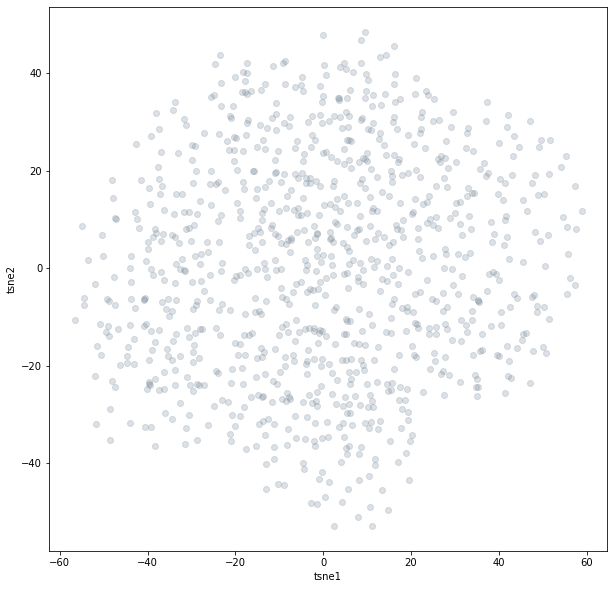

In [21]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [22]:
import matplotlib

In [23]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 921 samples in 0.002s...
[t-SNE] Computed neighbors for 921 samples in 0.074s...
[t-SNE] Computed conditional probabilities for sample 921 / 921
[t-SNE] Mean sigma: 0.648717
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.721436
[t-SNE] KL divergence after 2300 iterations: 0.820070


In [24]:
np.unique(labels)


array([0, 1, 2, 3], dtype=int32)

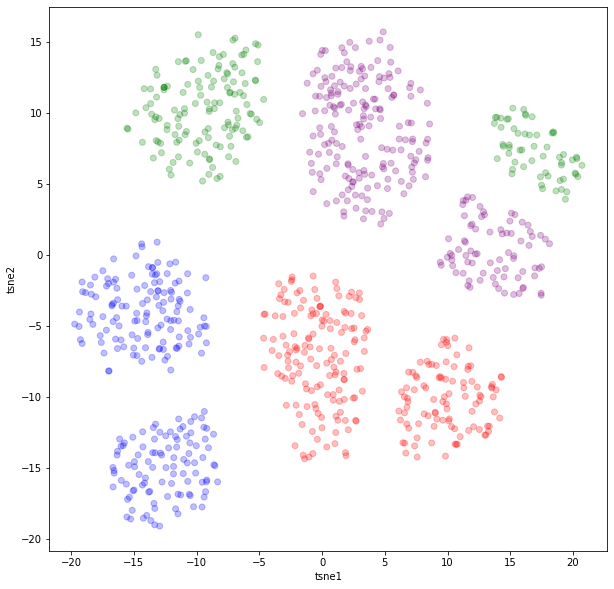

In [25]:
colors = ["red","green","blue","purple"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [26]:
Z2 = ms.inverse_transform(Z)
Z2

array([[ 5.87755102e-01,  6.00000000e-01,  2.60816327e+00,
         1.00000000e+00,  1.00000000e+00,  1.35795918e+01,
         1.39142857e+01,  1.39224490e+01,  3.95918367e+00,
         3.42448980e+00,  3.50612245e+00,  2.61224490e+00,
         2.80000000e+00,  3.27346939e+00],
       [ 5.58510638e-01,  6.91489362e-01,  2.67021277e+00,
         6.66133815e-16, -2.22044605e-16,  1.35531915e+01,
         1.35585106e+01,  1.36808511e+01,  4.38297872e+00,
         3.51063830e+00,  3.70212766e+00,  2.65957447e+00,
         2.88297872e+00,  3.28723404e+00],
       [ 3.03030303e-01,  5.58441558e-01,  2.64935065e+00,
         9.99200722e-16,  1.00000000e+00,  1.37056277e+01,
         1.37402597e+01,  1.39870130e+01,  3.80952381e+00,
         3.54978355e+00,  3.73593074e+00,  2.44155844e+00,
         3.03463203e+00,  3.49783550e+00],
       [ 7.12062257e-01,  6.96498054e-01,  2.70817121e+00,
         1.00000000e+00, -6.66133815e-16,  1.34085603e+01,
         1.37821012e+01,  1.39494163e+01,  4.